
# Project: Investigating the tmdb-movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected the tmdb-movies dataset for my project.

One question I'd like to explore using this dataset is - "What is the correlation between movie popularity and revenue?" Or more specifically, is there a strong correlation or a weak correlation between movie popularity and revenue? This question is it important as it could set a metric for revenue and financial success. If there is a strong correlation between popularity and revenue, then there is a high probability that, as long as a movie is popular, it will do well financially.

Another question worth asking might be - "What are the more popular genres?" This importance of this should be obvious, but it's worth knowing what genres people watch more. The more popular a movie genre, the easier it would be for directors and producers to make informed decisions on which kinds of films they can focus their efforts on.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
#!pip install --upgrade pandas==1.0.3


<a id='wrangling'></a>
## Data Wrangling

Here I am loading the data and printing the first few rows for a peek into the data.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='cleaning'></a>
### Data Cleaning 

Checking for and eliminating duplicate entries


In [3]:
#checking for duplicate values - 1 detected
sum(df.duplicated())

#clean the duplicate record
df.drop_duplicates(inplace=True)

#checking again returns 0 duplicates
sum(df.duplicated())

0

### Removing 0 values

When we look at our data frame, we see there are many 0 values.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Lets remove those 0 values from our data set using the code below

In [5]:
#Creating a copy of the data so we don't mess with the original data set
df1=df.copy()
zero_cols=['budget','revenue','runtime','budget_adj','revenue_adj']
df1[zero_cols]=df1[zero_cols].apply(lambda cols: cols.replace(0,np.nan),axis=1)
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,5.169000e+03,4.849000e+03,10834.000000,10865.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,92134.091971,1.000231,3.890441e+07,1.620801e+08,30.948225,575.644627,0.935138,12.813260,4.196096e+07,1.988557e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,20662.000000,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,2.271505e+07,4.395666e+07
75%,75612.000000,0.713857,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
### Exploratory Data Analysis

Now that we have wrangled and cleaned the data, it's ready for visualization by plotting it on a graph. Since we want to see trends, using a scatter plot here with an alpha setting will help us see each point clearly, thus drawing a more accurate conclusion.

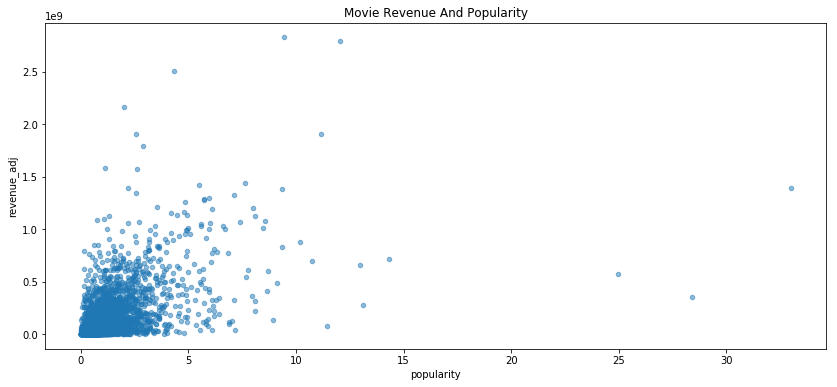

In [28]:
# I am using revenue_adj, which is the inflation adjusted revenue

df1.plot.scatter(x='popularity', y='revenue_adj', alpha=0.5, figsize=[14, 6])
plt.title('Movie Revenue and Popularity'.title())
plt.show()

### Weak Correlation

In the scatter plot above, we can see that there is a weak correlation between popularity and revenue. In other words, revenue does not seem to dictate if a movie is popular. Similarly, popularity does not seem to be necessarily impacted by a movie's revenue. With the exception of some outliers, relying on popularity as a metric for revenue does not make much sense. However, perhaps it is worth knowing the popular movie genres instead, as we will explore later in this analysis.

### Exploring our next question

Now let's take a look at popular movie genres. Before we can visualize the data, we need to split up the genres, since they are grouped together in the same column.

Since they are split by a '|' character, we can use that in the str.split() function.

In [17]:
#split on '|' and create a new variable genres_df1 based on the df1 data frame
genres_df1 = df1.assign(genres=df['genres'].str.split('|')).explode('genres') 
#print a few lines of data to verify the split worked
genres_df1.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Next we need to group by genres

Grouping the movies together by their respective genres so that we can visualize in the next step.

In [8]:
#Using groupby to group the genres together by an average (or mean) of their popularity rating
genres_df1.groupby('genres').popularity.mean()

genres
Action             0.926274
Adventure          1.154259
Animation          0.852182
Comedy             0.592607
Crime              0.744930
Documentary        0.181432
Drama              0.591495
Family             0.786668
Fantasy            0.992840
Foreign            0.191496
History            0.575936
Horror             0.465357
Music              0.487321
Mystery            0.690012
Romance            0.592082
Science Fiction    1.001548
TV Movie           0.270896
Thriller           0.741563
War                0.727683
Western            0.590615
Name: popularity, dtype: float64

Text(0,0.5,'Genres')

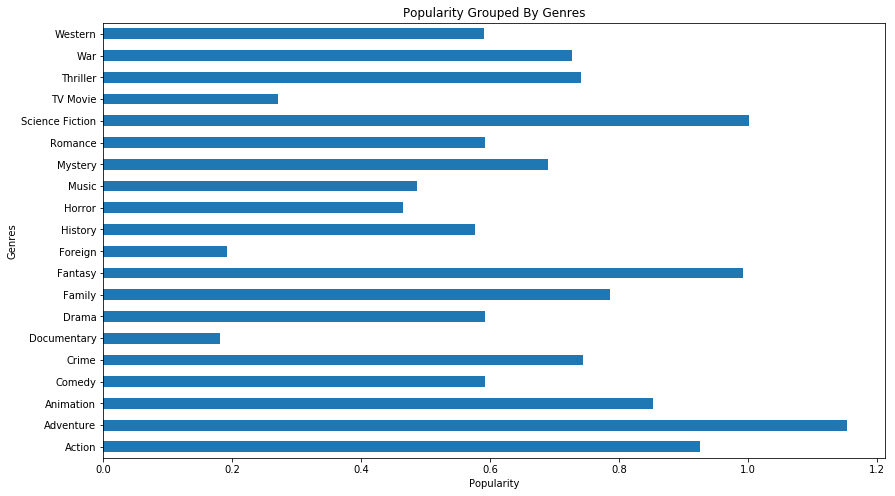

In [15]:
genres_df1.groupby('genres').popularity.mean().plot.barh(figsize=[14,8],rot=0)
plt.title('Popularity Grouped By Genres'.title())
plt.xlabel('Popularity'.title())
plt.ylabel('Genres'.title())

The above graph shows what the popular genres are. This is helpful information because it confirms what people are more likely to watch. Again, this helps movie directors and producers know which types of movies to focus their efforts on, and helps theatres show popular movies for higher box office sales.

Next, lets take a look at the Dsitribution of Popularity

Text(0,0.5,'Frequency')

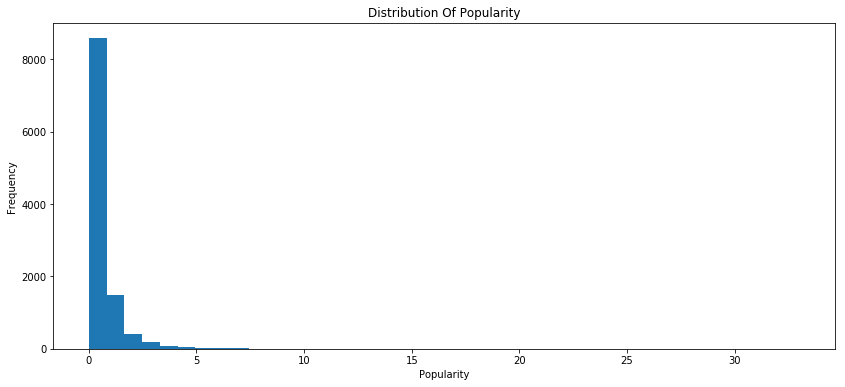

In [10]:
#Plotting distribution of Popularity/Frequency
df1['popularity'].hist(grid=False,bins=40,figsize=[14,6])
plt.title('Distribution of Popularity'.title())
plt.xlabel('popularity'.title())
plt.ylabel('frequency'.title())

The graph above shows that most movies fall in the 0-1 rating of popularity. We can conclude that if a movie is above this range, that means the movie is above average in terms of popularity.

Perhaps showing the **average** popularity by genre would be useful, since we can factor in all ranges of popularity into an average. We'll create a new function in the cell below, so that it can be used later.

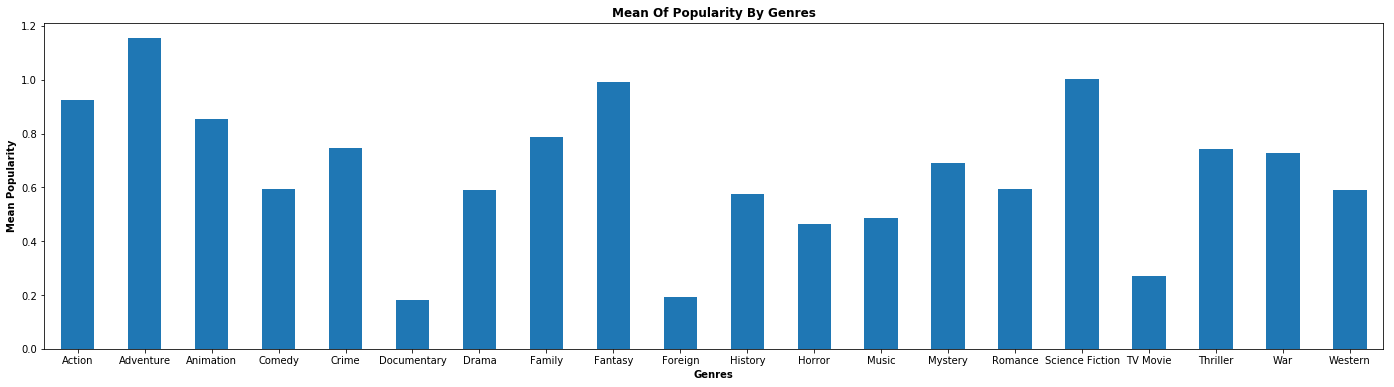

In [11]:
#Creating a function here so that it can be reused later for more analysis of data
def myGrpPlot(df,grpVar,yVar,stat='mean',figsize=[24,6]):
    df.groupby(grpVar)[yVar].agg(stat).plot.bar(figsize=figsize,rot=0)
    plt.title(f'{stat} of {yVar} by {grpVar}'.title(),weight="bold")
    plt.xlabel(grpVar.title(),weight="bold")
    plt.ylabel(f'{stat} {yVar}'.title(),weight="bold")

#Calling the function I just made
myGrpPlot(genres_df1,'genres','popularity')

The graph above shows the average popularity of each movie genre.

### Looking at Runtime

This gives us a glimpse into how long the movies tend to run. This could be helpful information in determining and targeting certain audiences.

Text(0,0.5,'Frequency')

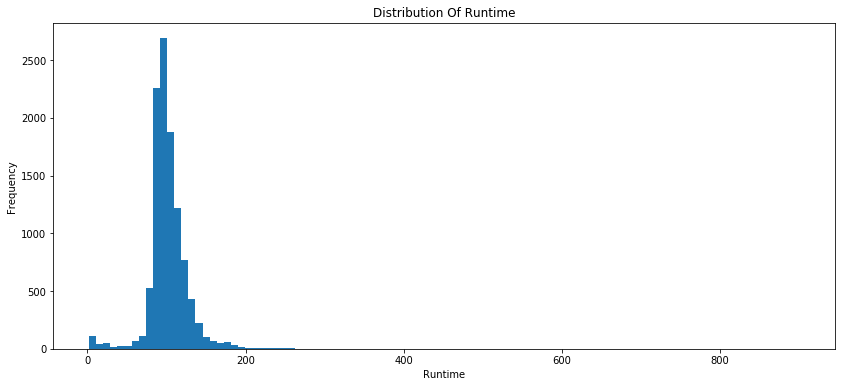

In [27]:
df1['runtime'].hist(grid=False,bins=100,figsize=[14,6])
plt.title('Distribution of Runtime'.title())
plt.xlabel('runtime'.title())
plt.ylabel('frequency'.title())

The above graph shows the distribution of runtime, with majority of the movies in the 60-120 minutes range. A few movies run longer, and even fewer run shorter.

### Runtime by genre will give us more useful information

This gives us an idea of which genres run longer, and which run shorter. More valuable than the distribution of runtime, since we are seeing now which genres tend to run longer or shorter.

Below, I am calling the myGrpPlot function I defined earlier to show the runtime by genre.

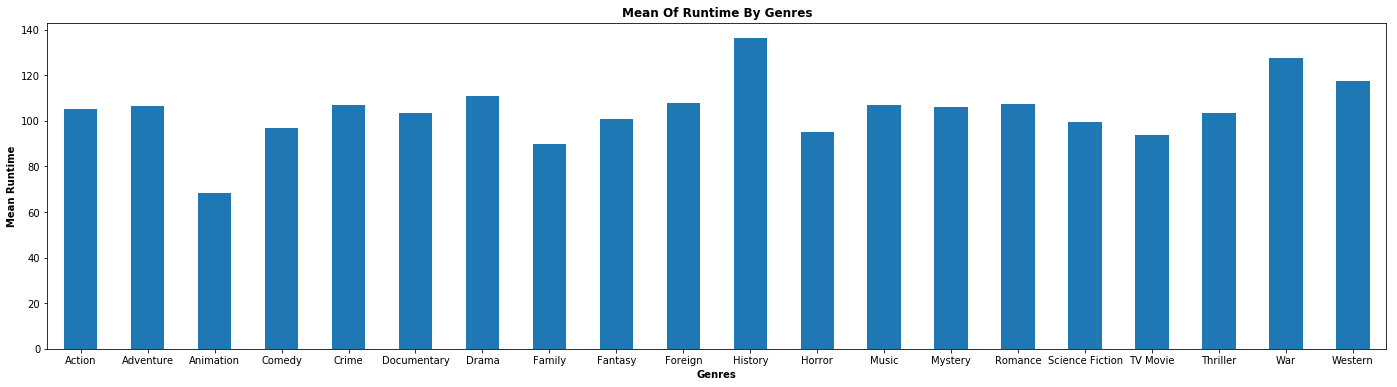

In [13]:
#Calling the myGrpPlot from the function defined earlier
myGrpPlot(genres_df1,'genres','runtime')

From the graph above we can see that the top 3 longest runtime genres are: History, War, and Western. 
We can also see the top 3 shortest runtime genres are: Animation, Family, and Horror/TV Movie. This is useful information for determining your audience. For example, family and animation movies could be targeted towards younger audiences, or audiences with children. 

<a id='conclusion'></a>
### Conclusion

What we have determined through Exploratory Data Analysis:
1. There is a weak correlation between popularity and revenue
2. The top 3 popular genres are: Adventure, Fantasy, Science Fiction
3. Top 3 genres that run the longest (runtime) are: History, War, Western
4. Top 3 genres that runt he shortest (runtime) are: Animation, Family, Horror/TV Movie

### Limitations

Some records are not included in the analysis due to the presence of 0 values in the budget/revenue columns

### Additional Information that could be useful:
Distinctions between "normal" and "3D" versions of the movie in the data